# 🧠 Big Data Challenge 2: Customer Segmentation

Answer each question in the cells provided below.

## 1. Load the Mall Customer Dataset (Easy)

Load the `data.csv` file using pandas and preview the first 5 rows.

**Expected Output:** Use `pd.read_csv()` and `.head()`.

Memuat Dataset

In [41]:
#import library pandas
import pandas as pd

#mengatur opsi agar Pandas menampilkan semua kolom tanpa ellipsis (...)
pd.set_option('display.max_columns', None)

#membaca file
file_path = '../data/data.csv'
df = pd.read_csv(file_path)

#5 baris pertama
print("ini 5 baris pertama dengan semua kolom terlihat:")
df.head()

ini 5 baris pertama dengan semua kolom terlihat:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [42]:
#melihat daftar kolom
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [43]:
#melihat jumlah baris dan kolom
jumlah_baris = df.shape[0]
jumlah_kolom = df.shape[1]
print(f"\nJumlah kolom di DataFrame adalah: {jumlah_kolom}")
print(f"\nJumlah baris di DataFrame adalah: {jumlah_baris}")


Jumlah kolom di DataFrame adalah: 5

Jumlah baris di DataFrame adalah: 200


## 2. Basic Data Exploration (Easy)

Display dataset info, check for missing values, and generate summary statistics.

**Hint:** Use `.info()`, `.isnull().sum()`, and `.describe()`.

### Informasi Dataset

In [44]:
#menampilkan informasi umum dataset (tipe data, non-null count, memory usage)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


* tidak ada tipe value yang perlu di rubah
* dataset memiliki 200 baris
* dataset memiliki 5 kolom
* tidak ada data yang hilang

### Jumlah Nilai Hilang di Setiap Kolom

In [45]:
#mngecek jumlah nilai yang hilang (missing values) di setiap kolom
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


tidak ada missing value

### Statistik Deskriptif Dataset

In [46]:
#menampilkan statistik deskriptif dari kolom numerik (mean, std, min, max, dll.)
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


* usia rata rata 38 tahun
* usia termuda 18 tahun
* usia tertua 70 tahun
* pendapatan tahunan rata-rata sekitar 60.5 ribu dolar, terendah 15 ribu, tertinggi 137 ribu.
* Skor belanja rata-rata 50.2, terendah 1, tertinggi 99

## 3. Data Visualization - Age Distribution (Medium)

Create a histogram showing the distribution of customer ages.

**Bonus:** Plot gender distribution using a pie chart or bar chart.

### Histogram Distribusi Usia

Text(0, 0.5, 'Jumlah Pelanggan')

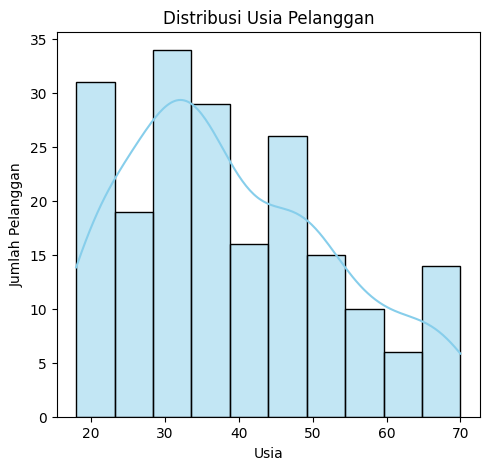

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1) 
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title('Distribusi Usia Pelanggan')
plt.xlabel('Usia')
plt.ylabel('Jumlah Pelanggan')

* sebagian besar pelanggan berada di rentang usia 20-an hingga 40-an. 
* semakin tua atau semakin muda, jumlah pelanggannya semakin sedikit.

### Distribusi Gender

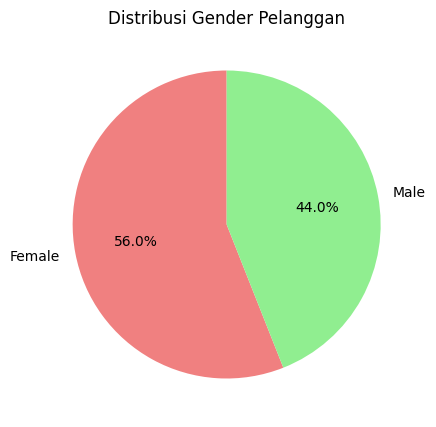

In [48]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Distribusi Gender Pelanggan')
plt.ylabel('') 
plt.show() 

* persentase pelanggan perempuan (Female) sebanyak 56.0% dan pelanggan laki-laki (Male) sebanyak 44.0%.
* jumlah pelanggan perempuan lebih banyak daripada pelanggan laki-laki.

## 4. Data Normalization (Medium)

Normalize the numerical features (e.g., Age, Income, Spending Score) using MinMaxScaler or StandardScaler.

**Expected Output:** Scaled dataframe with same shape.

### MinMaxScaler

In [49]:
from sklearn.preprocessing import MinMaxScaler

# identifikasi kolom numerik
numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# salinan df agar data asli tidak berubah
df_scaled = df.copy()

# inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# scaling (normalisasi) pada kolom-kolom numerik
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

# menampilkan 5 baris pertama dari DataFrame yang sudah di-scaling
print("DataFrame setelah normalisasi (MinMaxScaler):")
print(df_scaled.head())

DataFrame setelah normalisasi (MinMaxScaler):
   CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male  0.019231            0.000000                0.387755
1           2    Male  0.057692            0.000000                0.816327
2           3  Female  0.038462            0.008197                0.051020
3           4  Female  0.096154            0.008197                0.775510
4           5  Female  0.250000            0.016393                0.397959


### Informasi DataFrame setelah normalisasi

In [50]:
# memeriksa kembali info dari DataFrame yang sudah di-scaling
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     200 non-null    float64
 3   Annual Income (k$)      200 non-null    float64
 4   Spending Score (1-100)  200 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 7.9+ KB


* shape dataframe tetap sama yaitu 200 baris dan 5 kolom
* Age, Annual Income (k$), Spending Score (1-100) sekarang bertipe float64.

### Statistik Deskriptif DataFrame setelah normalisasi

In [51]:
# memeriksa kembali statistik deskriptif dari DataFrame yang sudah di-scaling
print(df_scaled.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000    0.400962            0.373443                0.502041
std     57.879185    0.268635            0.215285                0.263505
min      1.000000    0.000000            0.000000                0.000000
25%     50.750000    0.206731            0.217213                0.344388
50%    100.500000    0.346154            0.381148                0.500000
75%    150.250000    0.596154            0.516393                0.734694
max    200.000000    1.000000            1.000000                1.000000


## 5. Elbow Method for K-Means (Medium)

Use the elbow method to find the optimal number of clusters for K-Means.

**Steps:**
- Loop through k=1 to 10
- Fit KMeans and record inertia
- Plot inertia vs k

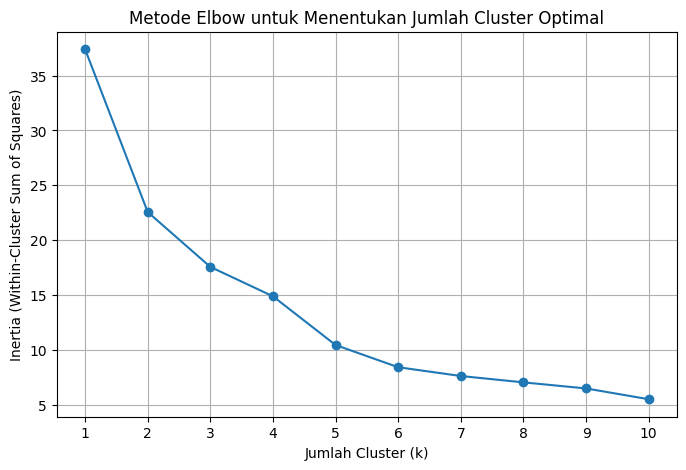

Nilai Inertia untuk setiap k:
k=1: 37.40
k=2: 22.56
k=3: 17.56
k=4: 14.88
k=5: 10.44
k=6: 8.42
k=7: 7.62
k=8: 7.03
k=9: 6.48
k=10: 5.50


In [52]:
from sklearn.cluster import KMeans

# memilih fitur numerik untuk clustering (menggunakan kolom yang sudah di normalisasi)
X = df_scaled[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# list untuk menyimpan nilai inertia
inertia = []

# loop dari k=1 sampai k=10
for k in range(1, 11):
    # inisialisasi model KMeans
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)

    # latih model KMeans pada data X
    kmeans.fit(X)

    # simpan nilai inertia dari model yang sudah dilatih
    inertia.append(kmeans.inertia_)

# plotting inertia terhadap jumlah k
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11)) # menampilkan semua angka k pada sumbu x
plt.grid(True)
plt.show()

print("Nilai Inertia untuk setiap k:")
for i, val in enumerate(inertia):
    print(f"k={i+1}: {val:.2f}")

* dari k=1 ke k=2, lalu ke k=3 dan k=4, nilai inertia turun dengan cukup drastis. karena semakin banyak cluster, data akan semakin terbagi dan jarak data ke pusat cluster-nya (inertia) akan semakin kecil.
* nilai inertia untuk setiap k juga mendukung pengamatan dari grafik. penurunan terbesar ada di awal, dan kemudian semakin berkurang.
* mempertimbangkan jumlah cluster otpimal antara 4 atau 5





## 6. Customer Segmentation with K-Means (Hard)

Fit KMeans using the optimal k from the previous step and assign cluster labels to each customer.

**Bonus:** Visualize clusters using a scatter plot with color-coded labels.

### K-Means Modeling

In [53]:
# menggunakan k=5
optimal_k = 5

# inisialisasi data yang akan digunakan untuk clustering
X = df_scaled[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# inisialisasi model KMeans dengan optimal_k
kmeans_model = KMeans(n_clusters=optimal_k, n_init='auto', random_state=42)

# latih model KMeans pada data X
kmeans_model.fit(X)

# mendapatkan label cluster untuk setiap pelanggan
cluster_labels = kmeans_model.labels_

# menambahkan kolom 'Cluster' ke DataFrame asli (df) untuk analisis lebih lanjut
df['Cluster'] = cluster_labels

# menampilkan beberapa baris pertama dari DataFrame dengan label cluster baru
print(f"DataFrame dengan label cluster (k={optimal_k}):")
print(df.head())

DataFrame dengan label cluster (k=5):
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        4  
2        2  
3        4  
4        4  


* kolom Cluster sudah berhasil ditambahkan ke DataFrame df asli. Ini berarti setiap pelanggan sekarang sudah punya label kelompoknya masing-masing. 

In [54]:
# menampilkan jumlah pelanggan di setiap cluster
print(f"\nJumlah pelanggan di setiap cluster (k={optimal_k}):")
print(df['Cluster'].value_counts().sort_index())


Jumlah pelanggan di setiap cluster (k=5):
Cluster
0    47
1    40
2    20
3    39
4    54
Name: count, dtype: int64


* K-Means berhasil membagi 200 pelanggan menjadi 5 kelompok dengan jumlah anggota yang bervariasi (dari 20 hingga 54 pelanggan per cluster).

### Visualisasi Cluster

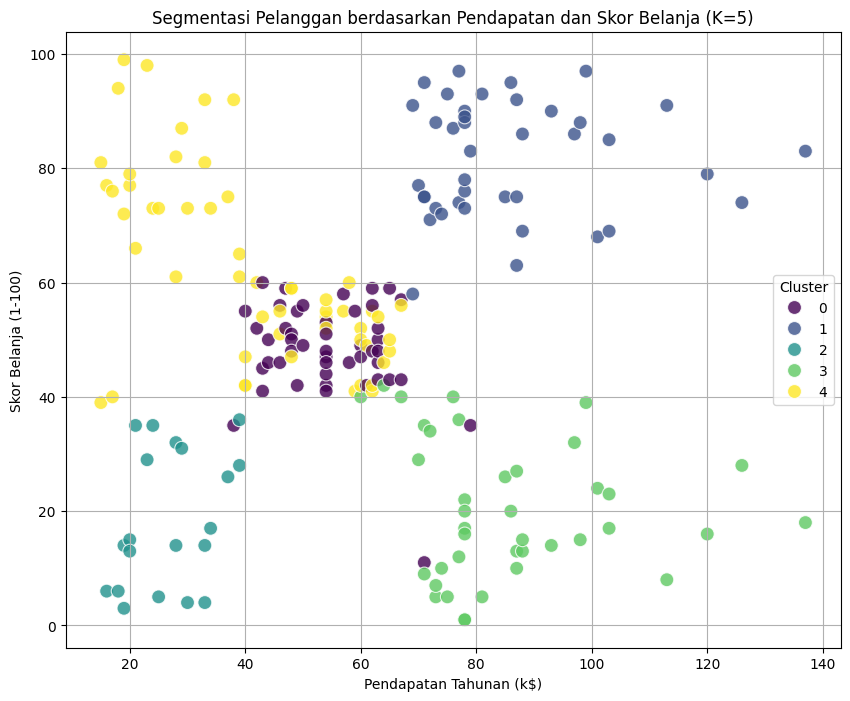

In [55]:
# Annual Income vs Spending Score
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df,
                palette='viridis', s=100, alpha=0.8, legend='full')
plt.title(f'Segmentasi Pelanggan berdasarkan Pendapatan dan Skor Belanja (K={optimal_k})')
plt.xlabel('Pendapatan Tahunan (k$)')
plt.ylabel('Skor Belanja (1-100)')
plt.grid(True)
plt.show()

* titik-titik dengan warna yang sama (satu cluster) cenderung berkumpul bersama dan terpisah dari cluster lain. Ini adalah indikasi kuat bahwa K-Means berhasil menemukan kelompok-kelompok yang berbeda di data 
* Cluster 0 (ungu) ada di tengah: pendapatan menengah, skor belanja menengah. Ini bisa jadi "Pelanggan Rata-rata".
* Cluster 1 (ungu tua) ada di kanan atas: pendapatan tinggi, skor belanja tinggi. Ini bisa jadi "Pelanggan prioritas/loyal".
* Cluster 2 (biru muda) ada di kiri bawah: pendapatan rendah, skor belanja rendah. Ini bisa jadi "Pelanggan Biasa/Kurang Aktif".
* Cluster 3 (hijau muda) ada di kanan bawah: pendapatan tinggi, skor belanja rendah. Ini bisa jadi "Pelanggan Hemat/Potensi Meningkatkan Belanja".
* Cluster 4 (kuning) ada di kiri atas: pendapatan rendah, skor belanja tinggi. Bisa jadi "Pelanggan Impulsif/Pencari Diskon".



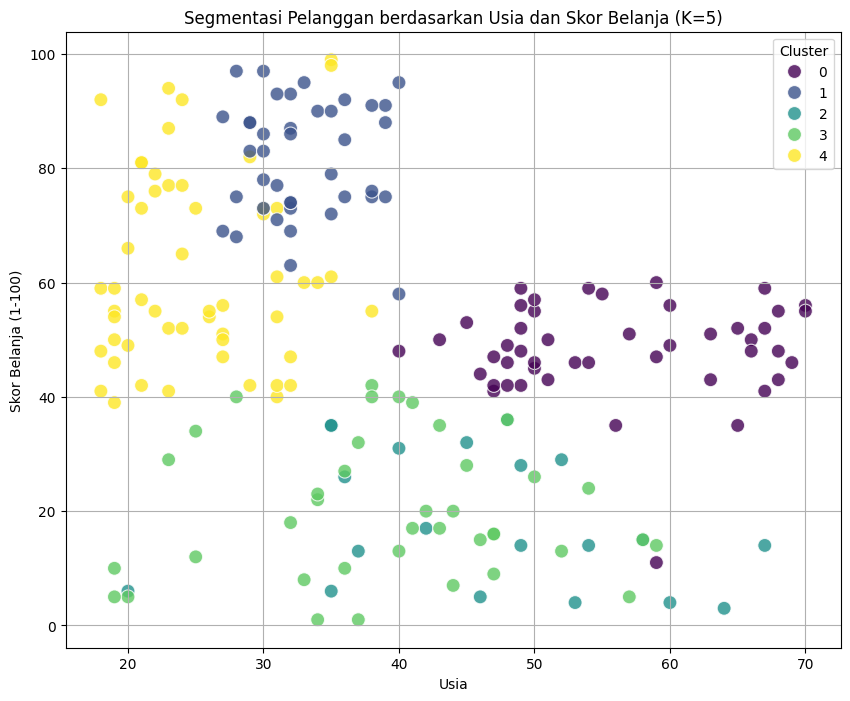

In [56]:
# Age vs Spending Score
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=df,
                palette='viridis', s=100, alpha=0.8, legend='full')
plt.title(f'Segmentasi Pelanggan berdasarkan Usia dan Skor Belanja (K={optimal_k})')
plt.xlabel('Usia')
plt.ylabel('Skor Belanja (1-100)')
plt.grid(True)
plt.show()

* Cluster 0 (ungu) cenderung di usia yang lebih tua, sementara Cluster 4 (kuning) cenderung di usia muda.


## 7. Cluster Profiling (Hard)

Analyze the characteristics of each customer cluster by calculating the mean of features per cluster.

**Expected Output:** Grouped summary statistics using `.groupby('Cluster')`.

### Ringkasan Statistik Rata-rata Fitur per Cluster

In [57]:
# menghitung rata-rata untuk fitur-fitur numerik per cluster
cluster_profile_numeric = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_profile_numeric)

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        56.042553           54.617021               48.234043
1        32.875000           86.100000               81.525000
2        46.250000           26.750000               18.350000
3        39.384615           85.820513               20.102564
4        25.185185           41.092593               62.240741


* Cluster 1: rata-rata usia 32, pendapatan 86k, skor belanja 81. bisa jadi segmen "pelanggan muda dengan pendapatan dan skor belanja tinggi".
* Cluster 2: rata-rata usia 46, pendapatan 26k, skor belanja 18. bisa jadi segmen "pelanggan lebih tua dengan pendapatan dan skor belanja rendah".



### Distribusi Gender per Cluster

In [58]:
# menghitung jumlah kemunculan setiap kategori per cluster.
cluster_profile_gender = pd.crosstab(df['Cluster'], df['Gender'])
print(cluster_profile_gender)

Gender   Female  Male
Cluster              
0            26    21
1            22    18
2            12     8
3            20    19
4            32    22


* Cluster 4 memiliki lebih banyak Female (32) daripada Male (22).

### Interpretasi Profil Cluster

In [59]:
# Cluster 0
print("\nCluster 0:")
print(f"- Usia rata-rata: {cluster_profile_numeric.loc[0, 'Age']:.1f} tahun")
print(f"- Pendapatan rata-rata: ${cluster_profile_numeric.loc[0, 'Annual Income (k$)']:.1f}K")
print(f"- Skor Belanja rata-rata: {cluster_profile_numeric.loc[0, 'Spending Score (1-100)']:.1f}")
print(f"- Gender: {cluster_profile_gender.loc[0, 'Female']} Perempuan, {cluster_profile_gender.loc[0, 'Male']} Laki-laki")
print("  >>> Ini mungkin segmen 'Pelanggan Menengah' (Usia Paruh Baya, Pendapatan & Skor Belanja Sedang)")


# Cluster 1
print("\nCluster 1:")
print(f"- Usia rata-rata: {cluster_profile_numeric.loc[1, 'Age']:.1f} tahun")
print(f"- Pendapatan rata-rata: ${cluster_profile_numeric.loc[1, 'Annual Income (k$)']:.1f}K")
print(f"- Skor Belanja rata-rata: {cluster_profile_numeric.loc[1, 'Spending Score (1-100)']:.1f}")
print(f"- Gender: {cluster_profile_gender.loc[1, 'Female']} Perempuan, {cluster_profile_gender.loc[1, 'Male']} Laki-laki")
print("  >>> Ini mungkin segmen 'Pelanggan Prioritas' (Usia Muda-Paruh Baya, Pendapatan & Skor Belanja Tinggi)")


# Cluster 2
print("\nCluster 2:")
print(f"- Usia rata-rata: {cluster_profile_numeric.loc[2, 'Age']:.1f} tahun")
print(f"- Pendapatan rata-rata: ${cluster_profile_numeric.loc[2, 'Annual Income (k$)']:.1f}K")
print(f"- Skor Belanja rata-rata: {cluster_profile_numeric.loc[2, 'Spending Score (1-100)']:.1f}")
print(f"- Gender: {cluster_profile_gender.loc[2, 'Female']} Perempuan, {cluster_profile_gender.loc[2, 'Male']} Laki-laki")
print("  >>> Ini mungkin segmen 'Pelanggan Hemat' (Usia Paruh Baya, Pendapatan & Skor Belanja Rendah)")


# Cluster 3
print("\nCluster 3:")
print(f"- Usia rata-rata: {cluster_profile_numeric.loc[3, 'Age']:.1f} tahun")
print(f"- Pendapatan rata-rata: ${cluster_profile_numeric.loc[3, 'Annual Income (k$)']:.1f}K")
print(f"- Skor Belanja rata-rata: {cluster_profile_numeric.loc[3, 'Spending Score (1-100)']:.1f}")
print(f"- Gender: {cluster_profile_gender.loc[3, 'Female']} Perempuan, {cluster_profile_gender.loc[3, 'Male']} Laki-laki")
print("  >>> Ini mungkin segmen 'Pelanggan Berpotensi' (Usia Muda-Paruh Baya, Pendapatan Tinggi, Skor Belanja Rendah)")


# Cluster 4
print("\nCluster 4:")
print(f"- Usia rata-rata: {cluster_profile_numeric.loc[4, 'Age']:.1f} tahun")
print(f"- Pendapatan rata-rata: ${cluster_profile_numeric.loc[4, 'Annual Income (k$)']:.1f}K")
print(f"- Skor Belanja rata-rata: {cluster_profile_numeric.loc[4, 'Spending Score (1-100)']:.1f}")
print(f"- Gender: {cluster_profile_gender.loc[4, 'Female']} Perempuan, {cluster_profile_gender.loc[4, 'Male']} Laki-laki")
print("  >>> Ini mungkin segmen 'Pelanggan Muda & Impulsif' (Usia Muda, Pendapatan Sedang, Skor Belanja Tinggi)")


Cluster 0:
- Usia rata-rata: 56.0 tahun
- Pendapatan rata-rata: $54.6K
- Skor Belanja rata-rata: 48.2
- Gender: 26 Perempuan, 21 Laki-laki
  >>> Ini mungkin segmen 'Pelanggan Menengah' (Usia Paruh Baya, Pendapatan & Skor Belanja Sedang)

Cluster 1:
- Usia rata-rata: 32.9 tahun
- Pendapatan rata-rata: $86.1K
- Skor Belanja rata-rata: 81.5
- Gender: 22 Perempuan, 18 Laki-laki
  >>> Ini mungkin segmen 'Pelanggan Prioritas' (Usia Muda-Paruh Baya, Pendapatan & Skor Belanja Tinggi)

Cluster 2:
- Usia rata-rata: 46.2 tahun
- Pendapatan rata-rata: $26.8K
- Skor Belanja rata-rata: 18.4
- Gender: 12 Perempuan, 8 Laki-laki
  >>> Ini mungkin segmen 'Pelanggan Hemat' (Usia Paruh Baya, Pendapatan & Skor Belanja Rendah)

Cluster 3:
- Usia rata-rata: 39.4 tahun
- Pendapatan rata-rata: $85.8K
- Skor Belanja rata-rata: 20.1
- Gender: 20 Perempuan, 19 Laki-laki
  >>> Ini mungkin segmen 'Pelanggan Berpotensi' (Usia Muda-Paruh Baya, Pendapatan Tinggi, Skor Belanja Rendah)

Cluster 4:
- Usia rata-rata: 25.

* Cluster 1 (Pelanggan Prioritas): Ini adalah kelompok paling menarik bagi bisnis. Usia relatif muda (32.9 tahun), pendapatan sangat tinggi ($86.1K), dan skor belanja juga sangat tinggi (81.5). Mereka adalah pelanggan ideal yang harus dipertahankan dan diberi perhatian khusus. Proporsi gender lumayan seimbang.

* Cluster 3 (Pelanggan Berpotensi): Pendapatan mereka sangat tinggi ($85.8K), mirip dengan Cluster 1. Namun, skor belanja mereka sangat rendah (20.1). Ini adalah segmen yang punya uang tapi tidak banyak belanja. Mereka punya potensi besar jika bisa dipicu untuk berbelanja lebih banyak. Usia mereka juga produktif (39.4 tahun).

* Cluster 4 (Pelanggan Muda & Impulsif): Kelompok ini punya usia paling muda (25.2 tahun), pendapatan menengah ($41.1K), tapi skor belanja mereka tinggi (62.2). Ini bisa jadi pelanggan yang suka diskon, promo, atau belanja impulsif. Jumlah perempuan lebih banyak di cluster ini.

* Cluster 2 (Pelanggan Hemat): Usia paruh baya (46.2 tahun), pendapatan dan skor belanja rendah ($26.8K dan 18.4). Ini adalah segmen yang mungkin perlu strategi promosi yang sangat menarik atau produk yang sangat terjangkau.

* Cluster 0 (Pelanggan Menengah): Usia paling tua (56.0 tahun), dengan pendapatan dan skor belanja di tengah-tengah. Ini bisa jadi segmen yang stabil tapi tidak terlalu aktif.